# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


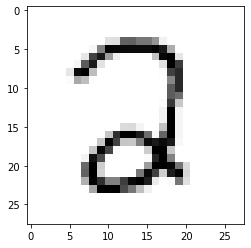

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.23874952193026056
train accuracy is: 0.6836087464530128, test accuracy is 0.6663306451612904


Epoch 10 Loss 0.09237573915066677
train accuracy is: 0.914538474378234, test accuracy is 0.9284274193548387


Epoch 20 Loss 0.05770910774194199
train accuracy is: 0.9384910699382407, test accuracy is 0.9495967741935484


Epoch 30 Loss 0.045651300576177035
train accuracy is: 0.9483391754298114, test accuracy is 0.9566532258064516


Epoch 40 Loss 0.03957404792890287
train accuracy is: 0.9556835252879319, test accuracy is 0.9647177419354839


Epoch 50 Loss 0.03587249077898124
train accuracy is: 0.9596060757803372, test accuracy is 0.96875


Epoch 60 Loss 0.03333267326829437
train accuracy is: 0.9615256217659823, test accuracy is 0.9692540322580645


Epoch 70 Loss 0.03143844488989776
train accuracy is: 0.9636955433149724, test accuracy is 0.969758064516129


Epoch 80 Loss 0.029938306247028684
train accuracy is: 0.9654481722583875, test accuracy is 0.969758064516129


Epoch 90 Loss 0.02870502207593327
train accuracy is: 0.9663662159906526, test accuracy is 0.969758064516129


Epoch 100 Loss 0.027669759185680303
train accuracy is: 0.9676180938073777, test accuracy is 0.9712701612903226


Epoch 110 Loss 0.026773824919130204
train accuracy is: 0.9686195960607578, test accuracy is 0.9717741935483871


Epoch 120 Loss 0.0259671492619637
train accuracy is: 0.9692872642296778, test accuracy is 0.9717741935483871


Epoch 130 Loss 0.02526059909848154
train accuracy is: 0.9701218494408279, test accuracy is 0.9717741935483871


Epoch 140 Loss 0.024611579890706697
train accuracy is: 0.9705391420464029, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.024018676170723372
train accuracy is: 0.971791019863128, test accuracy is 0.9737903225806451


Epoch 160 Loss 0.023462416188185793
train accuracy is: 0.9721248539475881, test accuracy is 0.9742943548387096


Epoch 170 Loss 0.02294217226514548
train accuracy is: 0.9728759806376232, test accuracy is 0.9737903225806451


Epoch 180 Loss 0.022450741452351753
train accuracy is: 0.9738774828910032, test accuracy is 0.9742943548387096


Epoch 190 Loss 0.02197604218710702
train accuracy is: 0.9742947754965782, test accuracy is 0.9737903225806451


Epoch 200 Loss 0.021515843803775886
train accuracy is: 0.9752962777499583, test accuracy is 0.9742943548387096


Epoch 210 Loss 0.021066769219194762
train accuracy is: 0.9762143214822233, test accuracy is 0.9742943548387096


Epoch 220 Loss 0.02063851887233418
train accuracy is: 0.9764646970455684, test accuracy is 0.9742943548387096


Epoch 230 Loss 0.020222017346152147
train accuracy is: 0.9772992822567184, test accuracy is 0.9747983870967742


Epoch 240 Loss 0.01981074641199218
train accuracy is: 0.9778000333834085, test accuracy is 0.9747983870967742


0.002579355485505543

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.26400901594008713
train accuracy is: 0.5932231680854615, test accuracy is 0.5811491935483871


Epoch 10 Loss 0.10306249897693845
train accuracy is: 0.913536972124854, test accuracy is 0.9259072580645161


Epoch 20 Loss 0.07829301715874319
train accuracy is: 0.9293106326155901, test accuracy is 0.9440524193548387


Epoch 30 Loss 0.06730010352363143
train accuracy is: 0.9374895676848606, test accuracy is 0.9490927419354839


Epoch 40 Loss 0.06080553080361477
train accuracy is: 0.942246703388416, test accuracy is 0.9536290322580645


Epoch 50 Loss 0.05641913982172997
train accuracy is: 0.9465865464863963, test accuracy is 0.9566532258064516


Epoch 60 Loss 0.053210539852175005
train accuracy is: 0.9490068435987314, test accuracy is 0.9581653225806451


Epoch 70 Loss 0.05073940840401342
train accuracy is: 0.9506760140210315, test accuracy is 0.9596774193548387


Epoch 80 Loss 0.04875985738423288
train accuracy is: 0.9520113503588716, test accuracy is 0.9606854838709677


Epoch 90 Loss 0.0471295381664699
train accuracy is: 0.9532632281755967, test accuracy is 0.9627016129032258


Epoch 100 Loss 0.04575583168297967
train accuracy is: 0.9539308963445168, test accuracy is 0.9637096774193549


Epoch 110 Loss 0.0445766534815172
train accuracy is: 0.9548489400767819, test accuracy is 0.9637096774193549


Epoch 120 Loss 0.04355152958733732
train accuracy is: 0.9556835252879319, test accuracy is 0.9652217741935484


Epoch 130 Loss 0.04264837602417618
train accuracy is: 0.9567684860624269, test accuracy is 0.9652217741935484


Epoch 140 Loss 0.04184359023143386
train accuracy is: 0.957269237189117, test accuracy is 0.9662298387096774


Epoch 150 Loss 0.041121112572293006
train accuracy is: 0.957686529794692, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.040466948972538455
train accuracy is: 0.9583541979636121, test accuracy is 0.9672379032258065


Epoch 170 Loss 0.039871648927839766
train accuracy is: 0.9582707394424971, test accuracy is 0.9672379032258065


Epoch 180 Loss 0.039326135212710535
train accuracy is: 0.9591053246536472, test accuracy is 0.9667338709677419


Epoch 190 Loss 0.03882408334504225
train accuracy is: 0.9595226172592222, test accuracy is 0.9672379032258065


Epoch 200 Loss 0.038359225814747946
train accuracy is: 0.9597729928225672, test accuracy is 0.9672379032258065


Epoch 210 Loss 0.037927278676001756
train accuracy is: 0.9602737439492572, test accuracy is 0.9672379032258065


Epoch 220 Loss 0.037524427708599484
train accuracy is: 0.9604406609914873, test accuracy is 0.967741935483871


Epoch 230 Loss 0.03714774468841318
train accuracy is: 0.9606075780337172, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.036794399632138985
train accuracy is: 0.9609414121181773, test accuracy is 0.9682459677419355


0.022912356191826848

### Comparing results of NN and LR

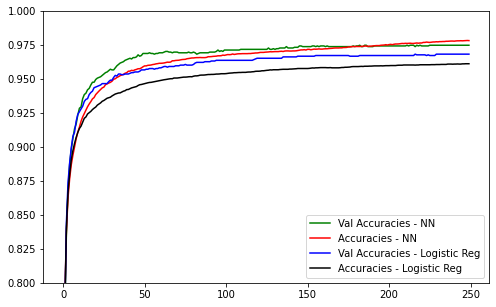

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

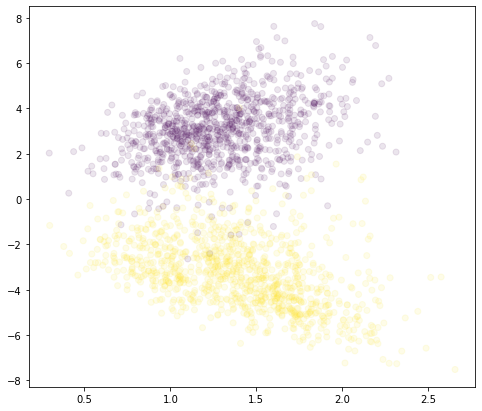

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

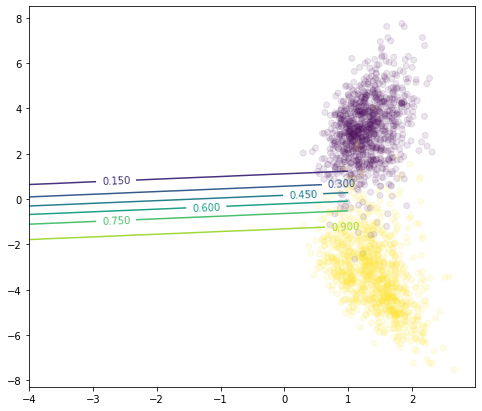

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );